In [6]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from rubin_sim.maf import radar, plot_run_metric_mesh
import os

from matplotlib.legend_handler import HandlerErrorbar

In [3]:

data_loaded = pd.read_hdf('summary.h5')
data_loaded.shape

(81, 175307)

In [4]:
# Pull out the metrics we are interested in and define simple names

name_dict = {'FootprintFraction N year 1 u and night < 365 HealpixSlicer': 'Y1,u',
            'FootprintFraction N year 1 g and night < 365 HealpixSlicer': 'Y1,g',
            'FootprintFraction N year 1 r and night < 365 HealpixSlicer': 'Y1,r',

            'FootprintFraction N year 1 i and night < 365 HealpixSlicer': 'Y1,i',
    'best18k Parallax fiveSigmaDepth, filter, seeingFwhmGeom, ra_pi_amp, dec_pi_amp HealpixSlicer': 'parallax best 18k',
            'best18k properMotion HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer': '20-30d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer': 'SNe, zlim',
            '3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis \ni-band',
            'Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer': 'KNe ZTF simple',
            'Total detected KNePopMetric_single_ztfrest_simple single model UserPointsSlicer': 'KNe single model',
            #'Sum PrestoKNe_score_p UserPointsSlicer': 'KNe Score, P',
            'Total detected XRBPopMetric_early_detect UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7 HealpixSlicer': 'Brown Dwarf Vol',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO bright',
            'CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO faint',
            'CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'TNO',
            'CumulativeCompleteness H <= 20.000000 DiscoveryNChances MBA 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'MBA',
            'CumulativeCompleteness H <= 18.000000 DiscoveryNChances Trojan 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'Trojan',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances Vatira 1 quad in 1 night detection loss MoObjSlicer': 'Vatira',
            'CumulativeCompleteness H <= 20.000000 DiscoveryNChances PHA 1 quad in 1 night detection loss MoObjSlicer': 'PHA, quad'}
            
# drop in the units for the columns
units = {'parallax best 18k': 'mas',
         'proper motion best 18k': 'mas/yr',
         '20-30d microlensing\ndetection': 'fraction', 
         '60-90d microlensing\ndetection': 'fraction', 
         'fO N vis' : '', 
         'SNe, N': '', 
         'SNe, zlim': '', 
         '3x2 i-band': 'score', 
         'WL Nvis \ni-band': '', 
         'KNe ZTF simple': 'N', 
         'KNe single model': 'N',
         'KNe Score, P': 'score',
         'XRB\nearly detect': 'N', 
         'Brown Dwarf Vol': 'pc^3', 
         'NEO bright': 'fraction', 
         'NEO faint': 'fraction', 
         'TNO': 'fraction', 
         'MBA':'fraction',
         'Trojan': 'fraction',
         'Vatira': 'fraction',
         'PHA, quad': 'fraction',
         'Y1,u': '',
         'Y1,g': '',
         'Y1,r': '',
         'Y1,i': '',
        }

# If columns are uncertainties, we want to plot them backwards
invert_cols = ['parallax best 18k', 'proper motion best 18k']
# If columns are mags or fractions, we want to plot differences, not fractional differences.
mag_cols = ['20-30d microlensing\ndetection', '60-90d microlensing\ndetection','SNe, zlim',
            'NEO bright', 'NEO faint', 'TNO', 'Vatira', 'MBA', 'Trojan',
           'u', 'g', 'r', 'i', 'z', 'y']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           'Total detected KNePopMetric_DD:COSMOS_ztfrest_simple DD:COSMOS UserPointsSlicer': 'Kne COSMOS',
         'Total detected KNePopMetric_DD:ECDFS_ztfrest_simple DD:ECDFS UserPointsSlicer': 'Kne ECDFS',
 'Total detected KNePopMetric_DD:EDFS_ztfrest_simple DD:EDFS UserPointsSlicer': 'Kne EDFS',
 'Total detected KNePopMetric_DD:ELAISS1_ztfrest_simple DD:ELAISS1 UserPointsSlicer': 'Kne ELAISS1',
 'Total detected KNePopMetric_DD:WFD_ztfrest_simple DD:WFD UserPointsSlicer': 'Kne WFD',
 'Total detected KNePopMetric_DD:XMM_LSS_ztfrest_simple DD:XMM_LSS UserPointsSlicer': 'Kne XMM_LSS',
            
            'Median DD:COSMOS NVisits all bands HealpixSubsetSlicer':'N COSMOS',
 'Median DD:ECDFS NVisits all bands HealpixSubsetSlicer': 'N ECDFS',
 'Median DD:EDFS NVisits all bands HealpixSubsetSlicer': 'N EDFS',
 'Median DD:ELAISS1 NVisits all bands HealpixSubsetSlicer': 'N ELAISS1',
 'Median DD:WFD NVisits all bands HealpixSubsetSlicer': 'N WFD',
 'Median DD:XMM_LSS NVisits all bands HealpixSubsetSlicer': 'N XMM_LSS', 
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 
gaps_dict = {}
for filtername in 'ugrizy':
    for times in [3,7,24]:
        gaps_dict['Mean N gaps in %s at %ihr in top 18k Gaps_%ihr %s band HealpixSlicer'% (filtername, times, times, filtername)] = 'gaps %s %i' % (filtername, times)
        #gaps_dict['Mean Gaps_%ihr %s band HealpixSlicer' % (times, filtername)] = 'gaps %s %i' % (filtername, times)
        
gaps_data = pd.DataFrame()
for key in gaps_dict:
    gaps_data[gaps_dict[key]] = data_loaded[key]

In [5]:
ddf_data

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS,...,Kne EDFS,Kne ELAISS1,Kne WFD,Kne XMM_LSS,N COSMOS,N ECDFS,N EDFS,N ELAISS1,N WFD,N XMM_LSS
baseline_v2.0_10yrs,638.253284,586.826209,974.231557,684.401547,611.229060,0.503926,0.485978,0.481621,0.508870,0.490990,...,365.0,423.0,298.0,317.0,8937.5,9264.0,5497.0,9262.0,833.0,9024.0
baseline_v2.1_10yrs,548.479625,545.669910,875.981802,636.634918,520.071105,0.496150,0.484905,0.474738,0.501027,0.480094,...,373.0,384.0,289.0,325.0,8900.0,9166.5,5506.0,9127.0,820.0,8941.0
baseline_v2.2_10yrs,708.239238,685.202422,1067.553931,674.561648,611.247120,0.493897,0.495572,0.466223,0.488264,0.484132,...,425.0,370.0,327.0,304.0,9853.0,9663.0,6150.0,9991.0,829.0,9869.0
baseline_v3.0_10yrs,955.159293,799.584601,1266.961769,688.808879,726.491723,0.503734,0.521961,0.464010,0.500330,0.484669,...,428.0,405.0,339.0,340.0,18716.5,10606.5,6668.0,10671.0,817.0,10845.0
baseline_v3.2_10yrs,971.481238,868.593513,1528.851192,844.740564,840.405268,0.510969,0.550142,0.486932,0.516296,0.502590,...,537.0,455.0,392.0,419.0,19496.5,10806.5,6800.0,10295.0,861.0,10714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weather_cloudso35v3.4_10yrs,931.201159,809.597913,1379.044260,777.300267,734.947313,0.548710,0.535488,0.496629,0.510424,0.497228,...,572.0,479.0,423.0,417.0,19240.5,9827.0,6115.0,9723.0,908.0,9586.0
weather_cloudso36v3.4_10yrs,971.367562,773.848626,1391.251789,827.270250,832.244000,0.550022,0.544726,0.502587,0.489120,0.505490,...,537.0,503.0,416.0,435.0,19501.0,9520.5,5864.0,9921.0,918.0,9905.0
weather_cloudso4v3.4_10yrs,999.605374,851.867808,1640.412837,855.877115,930.847858,0.537376,0.559896,0.512214,0.515553,0.518643,...,609.0,524.0,449.0,468.0,19240.5,10418.0,6539.0,10001.0,924.0,10166.0
weather_cloudso6v3.4_10yrs,999.888886,871.682608,1701.222170,898.212537,929.571852,0.546925,0.562375,0.508507,0.522198,0.504127,...,671.0,540.0,447.0,488.0,19865.5,10121.0,6553.0,10232.0,931.0,10511.0


In [43]:
indx = [i for i,name in enumerate(ddf_data.index) if 'ddf' in name or name == 'baseline_v3.4_10yrs']
ddf_data.iloc[indx]

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS,...,Kne EDFS,Kne ELAISS1,Kne WFD,Kne XMM_LSS,N COSMOS,N ECDFS,N EDFS,N ELAISS1,N WFD,N XMM_LSS
baseline_v3.4_10yrs,1010.159409,885.023398,1572.324198,850.867860,871.576094,0.519479,0.566542,0.506051,0.526520,0.515810,...,592.0,513.0,437.0,444.0,19199.0,10514.0,6720.0,9792.0,871.0,10362.0
ddf_half_v3.4_10yrs,1267.863020,1183.508047,1902.666826,1122.255040,1212.522268,0.565104,0.562478,0.503156,0.515737,0.518553,...,808.0,588.0,423.0,513.0,18658.5,10512.0,6417.0,9719.0,858.0,10287.0
ddf_loaded_fl15_v3.4_10yrs,1214.508975,1235.300913,1950.512842,1227.074220,1223.167485,0.522185,0.550047,0.505421,0.523078,0.514505,...,631.0,540.0,436.0,482.0,22228.5,12129.5,7723.0,11957.0,863.0,11754.0
ddf_loaded_fl1_v3.4_10yrs,853.785862,768.872305,1380.507182,730.955891,742.911321,0.484873,0.529208,0.481155,0.494090,0.490067,...,589.0,519.0,442.0,460.0,11108.5,6148.5,4442.0,6057.0,905.0,5752.0
ddf_loaded_fl2_v3.4_10yrs,1013.444503,960.126364,1641.607688,919.466082,922.211530,0.502264,0.540385,0.486936,0.507481,0.484754,...,643.0,549.0,445.0,447.0,14115.0,7996.5,5449.0,7477.0,887.0,7318.0
ddf_loaded_fl4_v3.4_10yrs,1081.758916,1120.206932,1833.120451,1110.793764,1132.210026,0.517706,0.553201,0.496554,0.519293,0.499102,...,642.0,519.0,415.0,471.0,17236.5,9728.0,6275.0,9490.0,873.0,9055.0
ddf_loaded_fl8_v3.4_10yrs,1120.811181,1194.658492,1899.645130,1180.876841,1174.131107,0.521314,0.547901,0.495746,0.519846,0.509427,...,667.0,534.0,431.0,474.0,19608.5,11116.0,7110.0,10908.0,863.0,10620.0
ddf_loaded_half_fl15_v3.4_10yrs,1386.575069,1315.461850,2066.974238,1319.585457,1349.163172,0.564821,0.548478,0.507313,0.533829,0.515336,...,789.0,591.0,456.0,498.0,21710.5,11984.0,7310.0,11755.0,855.0,11505.0
ddf_loaded_half_fl1_v3.4_10yrs,1157.269448,1002.207757,1596.103134,939.314029,979.311568,0.543512,0.518155,0.476695,0.476582,0.474827,...,690.0,597.0,429.0,523.0,11163.5,6378.0,4201.0,5927.0,894.0,5910.0
ddf_loaded_half_fl2_v3.4_10yrs,1235.415557,1162.004198,1833.052298,1112.963062,1154.967319,0.549596,0.535217,0.479714,0.503768,0.493584,...,789.0,621.0,436.0,508.0,13891.0,8009.5,5246.0,7546.0,881.0,7544.0


(<Figure size 600x600 with 2 Axes>, <Axes: >)

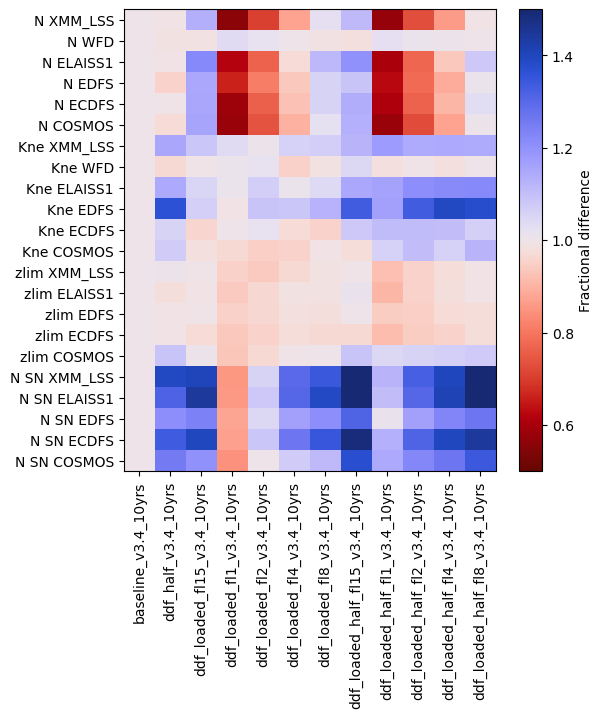

In [44]:
plot_run_metric_mesh(ddf_data.iloc[indx], baseline_run='baseline_v3.4_10yrs')

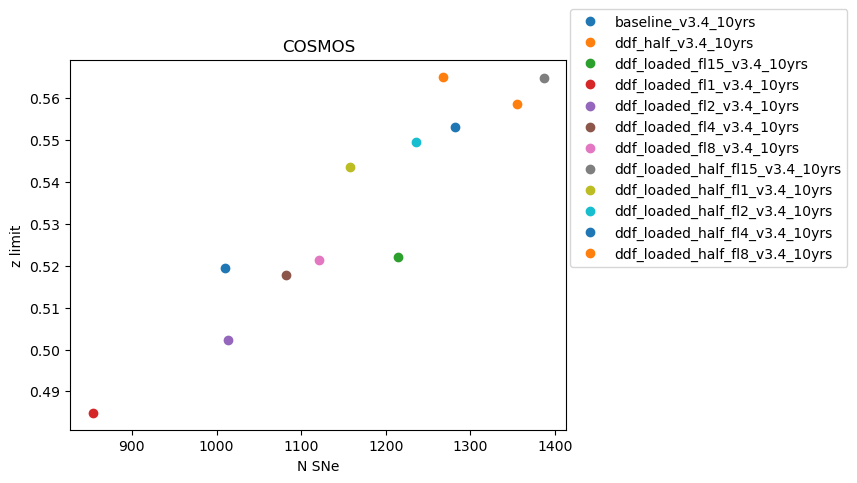

In [45]:
fig, ax = plt.subplots()

ddf_name = 'COSMOS'

for num,i in enumerate(indx):
    ax.plot(ddf_data.iloc[i]['N SN %s' % ddf_name], ddf_data.iloc[i]['zlim %s' % ddf_name], 'o', label=ddf_data.index[indx[num]])
ax.set_xlabel('N SNe')
ax.set_ylabel('z limit')
ax.set_title(ddf_name)
leg = fig.legend(bbox_to_anchor=(1.35,1.))